In [1]:
import pandas as pd

In [2]:
# Load the Excel file
file_path = 'Data Analyst Intern Assignment - Excel.xlsx'
excel_data = pd.ExcelFile(file_path)

In [3]:
# Checking the sheet names in the Excel file to identify the correct worksheet names
excel_data.sheet_names

['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']

In [5]:
# Reloading the sheets with corrected names
user_details_df = excel_data.parse(excel_data.sheet_names[0])
cooking_sessions_df = excel_data.parse(excel_data.sheet_names[1])
order_details_df = excel_data.parse(excel_data.sheet_names[2])

# Display the first few rows of each DataFrame to understand the data
user_details_df.head(), cooking_sessions_df.head(), order_details_df.head()

(  User ID      User Name   Age       Location Registration Date         Phone  \
 0    U001  Alice Johnson  28.0       New York        2023-01-15  123-456-7890   
 1    U002      Bob Smith  35.0    Los Angeles        2023-02-20  987-654-3210   
 2    U003    Charlie Lee  42.0        Chicago        2023-03-10  555-123-4567   
 3    U004    David Brown  27.0  San Francisco        2023-04-05  444-333-2222   
 4    U005     Emma White  30.0        Seattle        2023-05-22  777-888-9999   
 
                Email Favorite Meal  Total Orders  
 0    alice@email.com        Dinner          12.0  
 1      bob@email.com         Lunch           8.0  
 2  charlie@email.com     Breakfast          15.0  
 3    david@email.com        Dinner          10.0  
 4     emma@email.com         Lunch           9.0  ,
   Session ID User ID        Dish Name  Meal Type       Session Start  \
 0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
 1       S002    U002     Caesar Salad      Lun

# Data cleaning and merging these datasets

In [6]:
# Checking for null values and duplicates in each dataset
user_details_nulls = user_details_df.isnull().sum()
cooking_sessions_nulls = cooking_sessions_df.isnull().sum()
order_details_nulls = order_details_df.isnull().sum()

user_details_duplicates = user_details_df.duplicated().sum()
cooking_sessions_duplicates = cooking_sessions_df.duplicated().sum()
order_details_duplicates = order_details_df.duplicated().sum()

In [7]:
# Merging datasets on 'User ID' and 'Session ID'
merged_data = pd.merge(order_details_df, cooking_sessions_df, on=['Session ID', 'User ID'], how='inner')
merged_data = pd.merge(merged_data, user_details_df, on='User ID', how='inner')

In [8]:
# Summary of merged dataset
merged_data_info = merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           16 non-null     float64       
 1   User ID            16 non-null     object        
 2   Order Date         16 non-null     datetime64[ns]
 3   Meal Type_x        16 non-null     object        
 4   Dish Name_x        16 non-null     object        
 5   Order Status       16 non-null     object        
 6   Amount (USD)       16 non-null     float64       
 7   Time of Day        16 non-null     object        
 8   Rating             14 non-null     float64       
 9   Session ID         16 non-null     object        
 10  Dish Name_y        16 non-null     object        
 11  Meal Type_y        16 non-null     object        
 12  Session Start      16 non-null     datetime64[ns]
 13  Session End        16 non-null     datetime64[ns]
 14  Duration (mi

In [9]:
# Displaying results of cleaning and merging process
{
    "Null Values": {
        "UserDetails": user_details_nulls.to_dict(),
        "CookingSessions": cooking_sessions_nulls.to_dict(),
        "OrderDetails": order_details_nulls.to_dict()
    },
    "Duplicates": {
        "UserDetails": user_details_duplicates,
        "CookingSessions": cooking_sessions_duplicates,
        "OrderDetails": order_details_duplicates
    },
    "Merged Dataset Info": merged_data_info
}

{'Null Values': {'UserDetails': {'User ID': 0,
   'User Name': 0,
   'Age': 0,
   'Location': 0,
   'Registration Date': 0,
   'Phone': 0,
   'Email': 0,
   'Favorite Meal': 0,
   'Total Orders': 0},
  'CookingSessions': {'Session ID': 0,
   'User ID': 0,
   'Dish Name': 0,
   'Meal Type': 0,
   'Session Start': 0,
   'Session End': 0,
   'Duration (mins)': 0,
   'Session Rating': 0},
  'OrderDetails': {'Order ID': 0,
   'User ID': 0,
   'Order Date': 0,
   'Meal Type': 0,
   'Dish Name': 0,
   'Order Status': 0,
   'Amount (USD)': 0,
   'Time of Day': 0,
   'Rating': 2,
   'Session ID': 0}},
 'Duplicates': {'UserDetails': 0, 'CookingSessions': 0, 'OrderDetails': 0},
 'Merged Dataset Info': None}

# Filling missing ratings in the merged dataset with the mean rating

In [10]:
merged_data['Rating'] = merged_data['Rating'].fillna(merged_data['Rating'].mean())

In [11]:
# Starting Exploratory Data Analysis (EDA)

# Insights to analyze:
# 1. Popular dishes across all users
popular_dishes = merged_data['Dish Name_x'].value_counts()

# 2. Average order amount by meal type
avg_order_amount_by_meal = merged_data.groupby('Meal Type_x')['Amount (USD)'].mean()

# 3. Distribution of user ages
user_age_distribution = merged_data['Age'].describe()

# 4. Top locations by total orders
top_locations = merged_data['Location'].value_counts()

# 5. Correlation between session rating and order rating
rating_correlation = merged_data[['Session Rating', 'Rating']].corr()

# Displaying results of EDA
{
    "Popular Dishes": popular_dishes.head(),
    "Average Order Amount by Meal Type": avg_order_amount_by_meal.to_dict(),
    "User Age Distribution": user_age_distribution.to_dict(),
    "Top Locations by Total Orders": top_locations.head().to_dict(),
    "Rating Correlation": rating_correlation
}

{'Popular Dishes': Spaghetti          4
 Grilled Chicken    4
 Caesar Salad       3
 Pancakes           2
 Veggie Burger      2
 Name: Dish Name_x, dtype: int64,
 'Average Order Amount by Meal Type': {'Breakfast': 7.833333333333333,
  'Dinner': 13.3125,
  'Lunch': 10.0},
 'User Age Distribution': {'count': 16.0,
  'mean': 32.6875,
  'std': 5.839163752913025,
  'min': 25.0,
  '25%': 28.0,
  '50%': 30.5,
  '75%': 35.75,
  'max': 42.0},
 'Top Locations by Total Orders': {'New York': 3,
  'Los Angeles': 3,
  'Chicago': 3,
  'San Francisco': 2,
  'Seattle': 2},
 'Rating Correlation':                 Session Rating   Rating
 Session Rating         1.00000  0.61151
 Rating                 0.61151  1.00000}

# Visualizations for these findings

In [12]:
import matplotlib.pyplot as plt

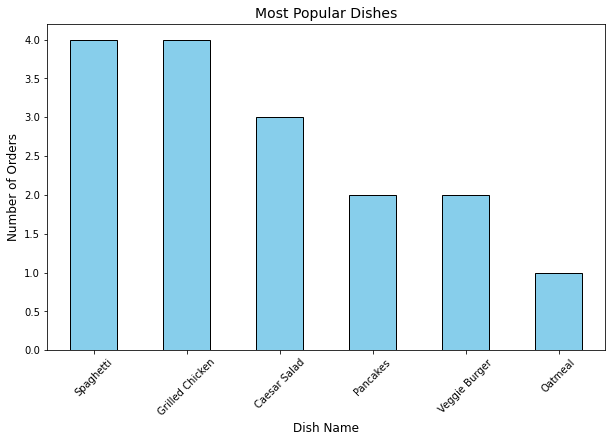

In [13]:
# Visualization 1: Popular Dishes
plt.figure(figsize=(10, 6))
popular_dishes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Most Popular Dishes', fontsize=14)
plt.xlabel('Dish Name', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

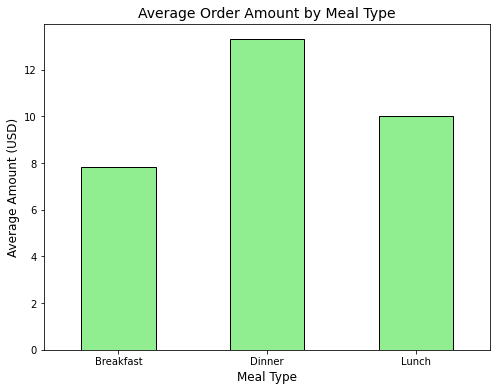

In [14]:
# Visualization 2: Average Order Amount by Meal Type
plt.figure(figsize=(8, 6))
avg_order_amount_by_meal.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Order Amount by Meal Type', fontsize=14)
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Average Amount (USD)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.show()

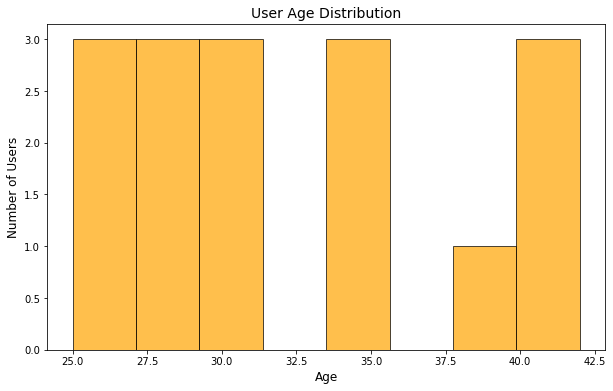

In [15]:
# Visualization 3: User Age Distribution (Histogram)
plt.figure(figsize=(10, 6))
plt.hist(merged_data['Age'], bins=8, color='orange', edgecolor='black', alpha=0.7)
plt.title('User Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.show()

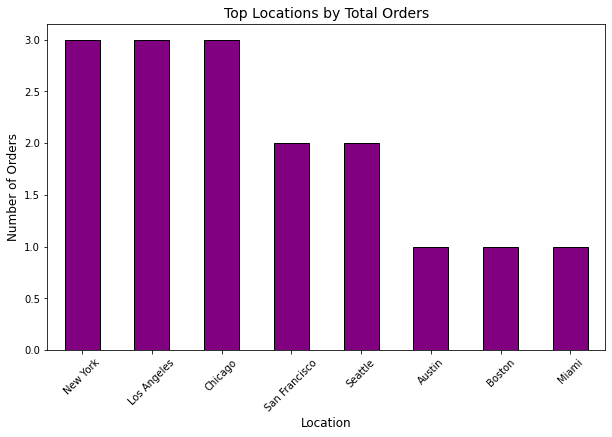

In [16]:
# Visualization 4: Top Locations by Total Orders
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top Locations by Total Orders', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [17]:
# Visualization 5: Correlation Heatmap for Ratings
import seaborn as sns

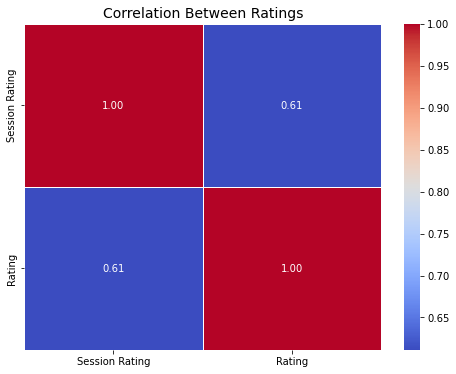

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(rating_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Ratings', fontsize=14)
plt.show()

# Sharpening Visuals: Visualizing Order Trends Over Time

In [19]:
# Extracting month-wise order trends
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'])
order_trends = merged_data.groupby(merged_data['Order Date'].dt.to_period('M')).size()

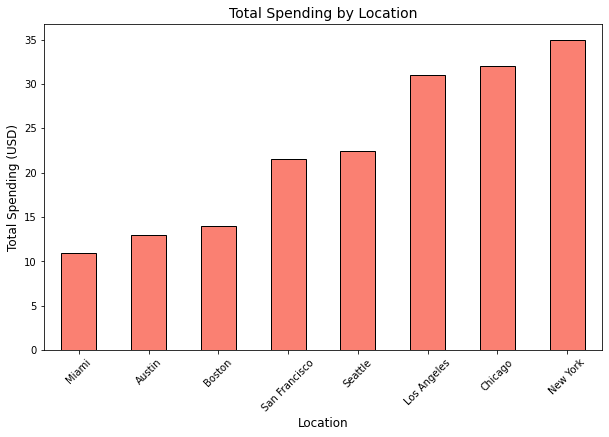

In [20]:
# Visualizing Spending Habits by Location
spending_by_location = merged_data.groupby('Location')['Amount (USD)'].sum()

plt.figure(figsize=(10, 6))
spending_by_location.sort_values().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Total Spending by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Spending (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

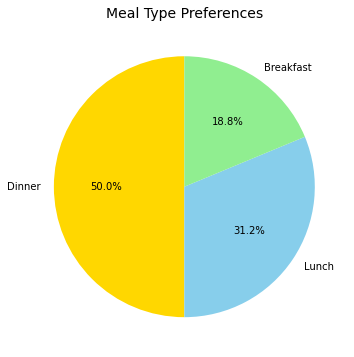

In [21]:
# Visualizing Meal Type Preferences
meal_type_counts = merged_data['Meal Type_x'].value_counts()

plt.figure(figsize=(8, 6))
meal_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'skyblue', 'lightgreen'])
plt.title('Meal Type Preferences', fontsize=14)
plt.ylabel('')  # Hide y-axis label
plt.show()

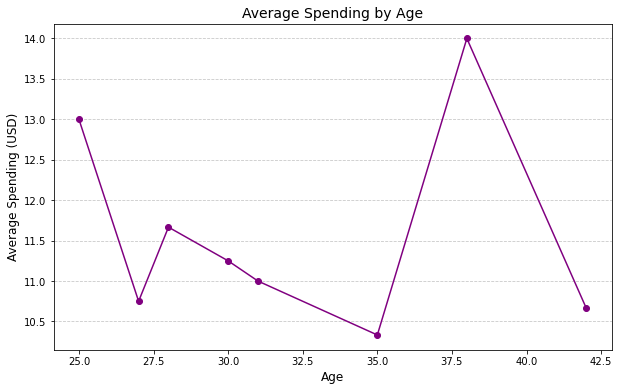

In [22]:
# Pulling deeper insights: User Spending by Age
spending_by_age = merged_data.groupby('Age')['Amount (USD)'].mean()

plt.figure(figsize=(10, 6))
spending_by_age.plot(kind='line', marker='o', color='purple')
plt.title('Average Spending by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Spending (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()